<a href="https://colab.research.google.com/github/dohyung-kim/ccri/blob/main/script/adm0/pillar1_processing_adm0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import glob
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import normaltest, probplot, skew, kurtosis

Summarize P1 layers

In [9]:
# Folder containing the CSV files
data_dir = '/content/drive/MyDrive/CCRI/ccri_repo/data'

!cp -r /content/drive/MyDrive/p1_exposure/* /content/drive/MyDrive/CCRI/ccri_repo/data/p1_exposure/

path = f'{data_dir}/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    first_two_words = '_'.join(filename_only.split('_')[:2])
    print(f"{first_two_words}: {df['child_population_exposed'].sum()}")


agricultural_drought: 1353338898.0077405
extreme_heat: 1137296046.6513245
fire_FRP: 87587284.85368355
drought_spi: 118223647.52046552
heatwave_severity: 321482510.86687
air_pollution: 2301006563.9999695
drought_spei: 202504415.6842643
heatwave_duration: 1071060045.1091511
fire_frequency: 141581891.79380432
heatwave_frequency: 1076547710.063318
coastal_flood: 33304839.826690417
river_flood: 349700773.71011966
vectorborne_malariapf: 704380018.7378261
tropical_storm: 662947016.7025924
sand_dust: 130323594.07410836
vectorborne_malariapv: 626248547.7136719
drought_spei: 202436713.3696013
drought_spi: 118221116.40168959


Hazard data normalization test with plots

In [10]:
#define function to remove outliers and find min max values to reduce skew
def trim_outliers_iteratively(values, max_skew=2, max_kurtosis=3.5):
    """
    Iteratively removes extreme min/max values until skewness <= 2 and kurtosis <= 3.5.
    Returns the trimmed dataset along with the final min and max.
    """
    # values = values.dropna().values  # Ensure no NaNs
    # values = np.log1p(values)
    while True:
        current_skew = skew(values)
        current_kurtosis = kurtosis(values)

        if abs(current_skew) <= max_skew and current_kurtosis <= max_kurtosis:
            break  # Stop if conditions are met

        # Remove min and max values
        min_val, max_val = values.min(), values.max()
        values = values[(values > min_val) & (values < max_val)]  # Trim extreme min/max

    return values, values.min(), values.max()

In [11]:
def boxplot_outlier_detection(values):
    """
    Detect outliers using the IQR method (1.5 IQR rule).
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return values that are within bounds
    return values[(values >= lower_bound) & (values <= upper_bound)], lower_bound, upper_bound

ploting normalized absolute exposure

processed : agricultural_drought min: 0.1 max: 8.570508067650563
agricultural_drought: Log Transformation and Scaling - skew=-1.539, kurtosis=1.407
IQR processed : agricultural_drought min: 2.362677306805135 max: 9.231803873383221


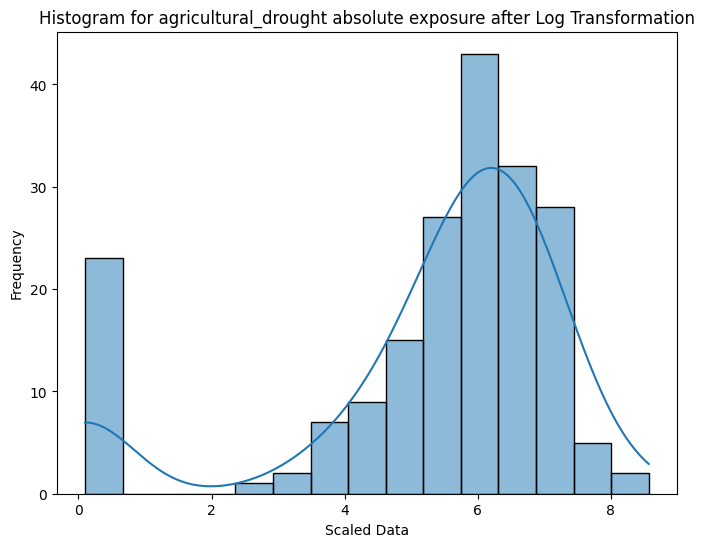

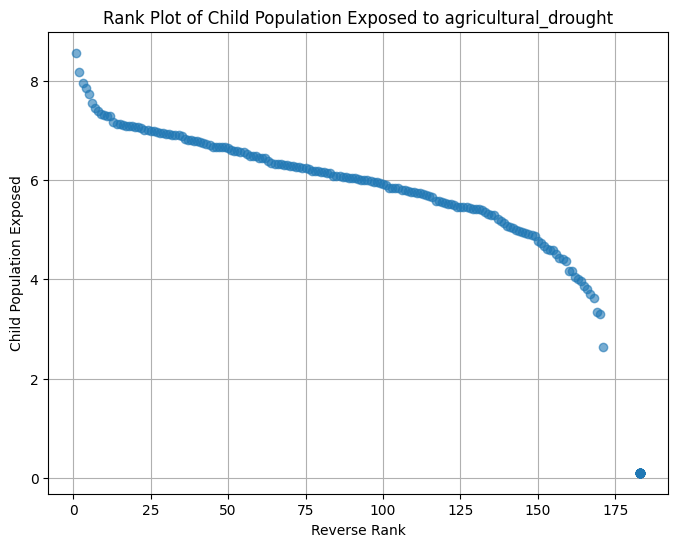

processed : extreme_heat min: 0.1 max: 8.594819460370596
extreme_heat: Log Transformation and Scaling - skew=-0.162, kurtosis=-1.784
IQR processed : extreme_heat min: -9.355789743683335 max: 15.859649572805559


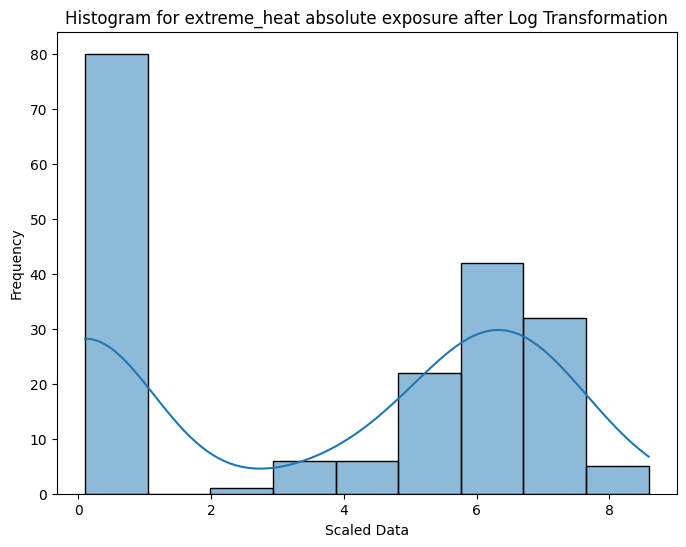

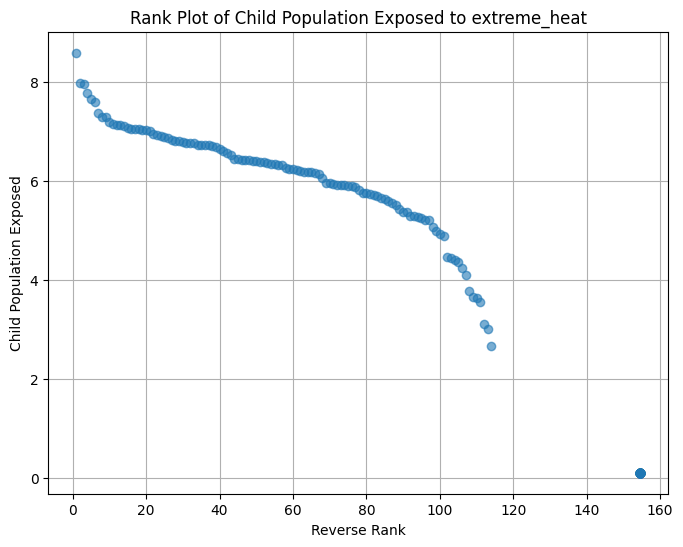

processed : fire_FRP min: 0.1 max: 6.877535295558921
fire_FRP: Log Transformation and Scaling - skew=-1.249, kurtosis=0.390
IQR processed : fire_FRP min: 1.2237030417588133 max: 8.24830963784923


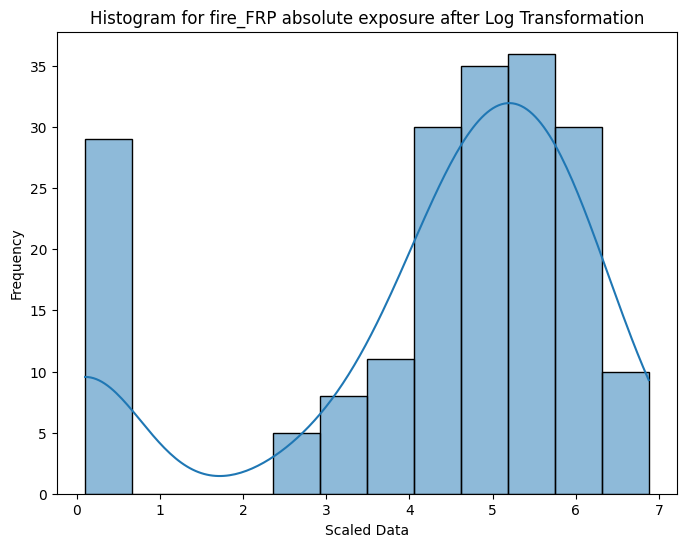

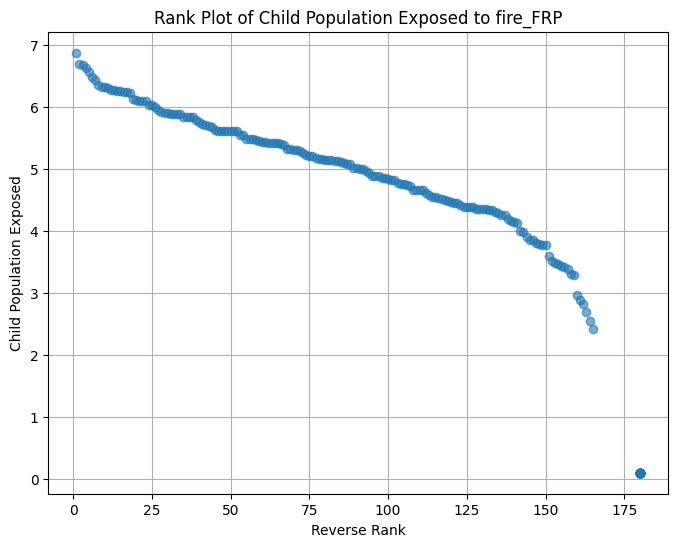

processed : drought_spi min: 0.1 max: 7.371861566519392
drought_spi: Log Transformation and Scaling - skew=-0.286, kurtosis=-1.184
IQR processed : drought_spi min: -7.026682929863771 max: 11.977804883106284


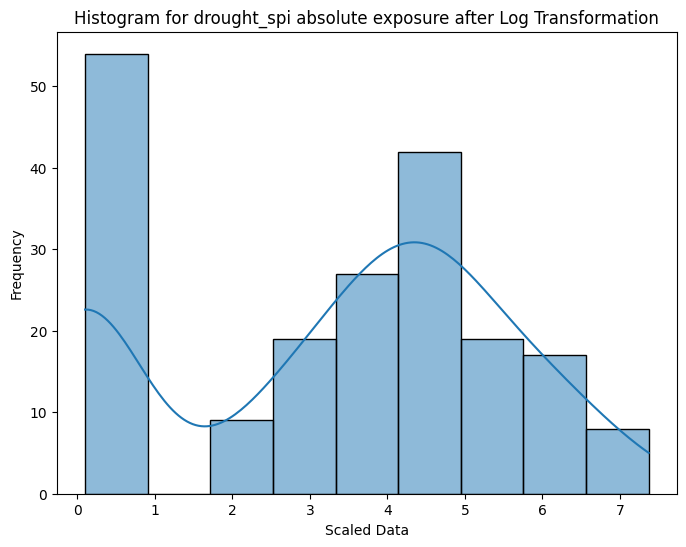

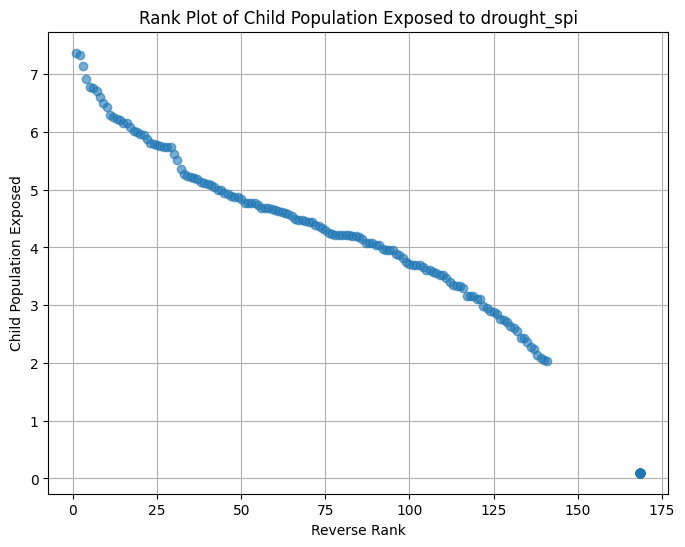

processed : heatwave_severity min: 0.1 max: 8.03495277197151
heatwave_severity: Log Transformation and Scaling - skew=0.390, kurtosis=-1.601
IQR processed : heatwave_severity min: -8.246333770505162 max: 14.01055628417527


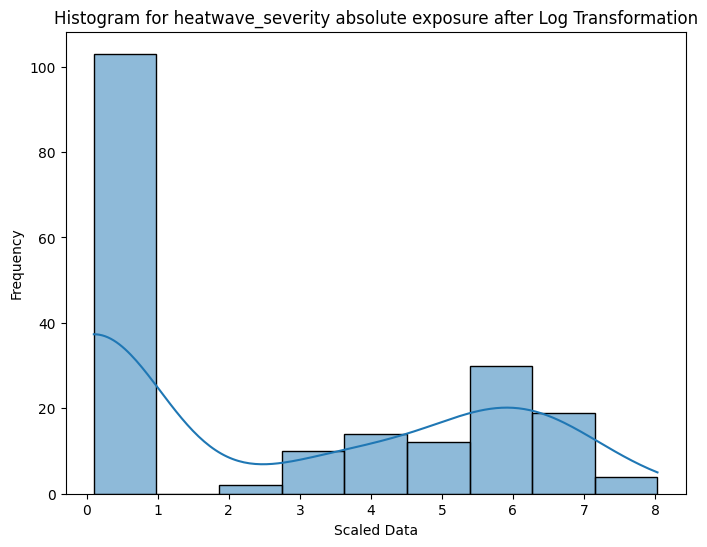

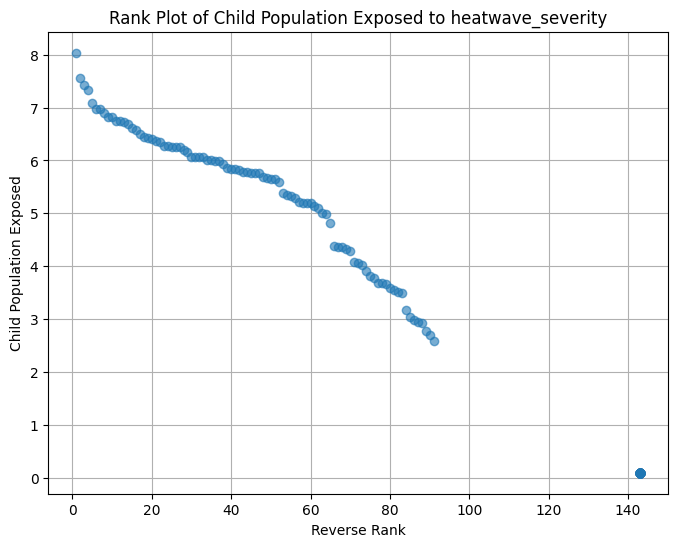

processed : air_pollution min: 2.2581055713750446 max: 8.4330765166382
air_pollution: Log Transformation and Scaling - skew=-0.971, kurtosis=1.135
IQR processed : air_pollution min: 3.7547970722612884 max: 8.932103307508944


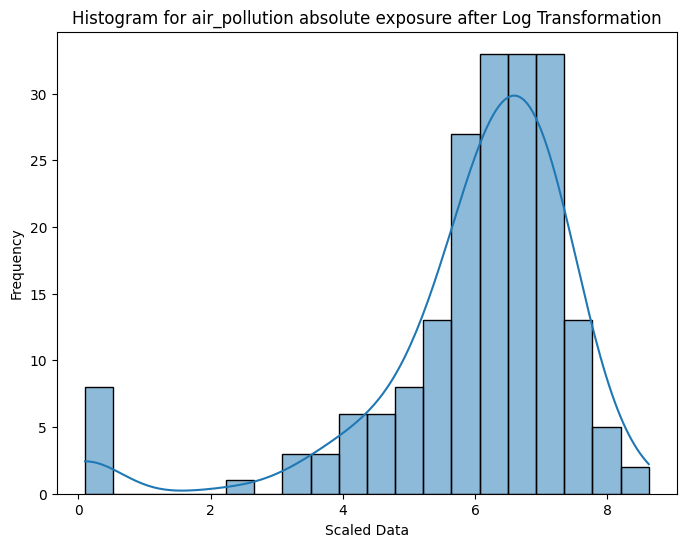

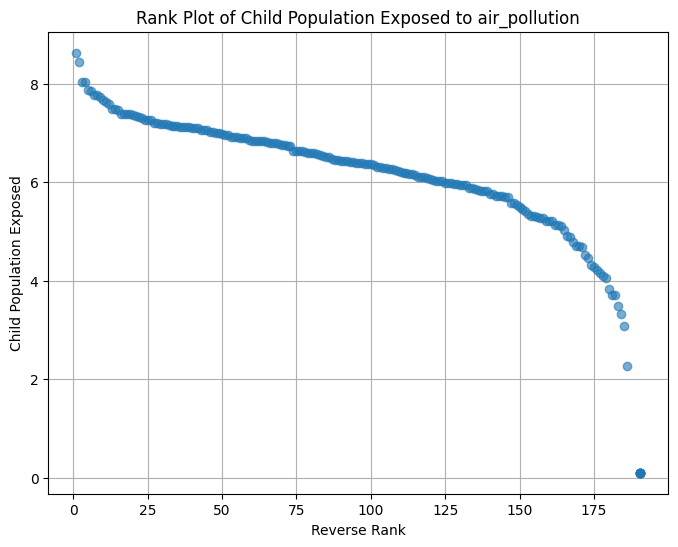

processed : drought_spei min: 0.1 max: 7.554834832953927
drought_spei: Log Transformation and Scaling - skew=-0.699, kurtosis=-0.639
IQR processed : drought_spei min: -0.8808485251934943 max: 9.324827321755057


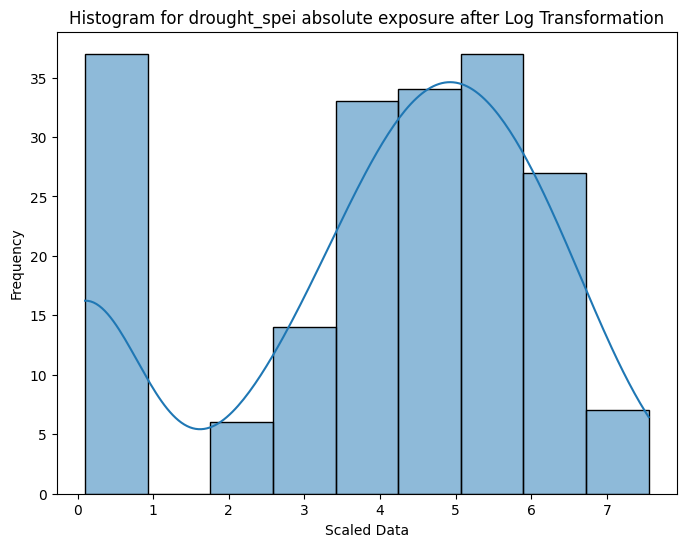

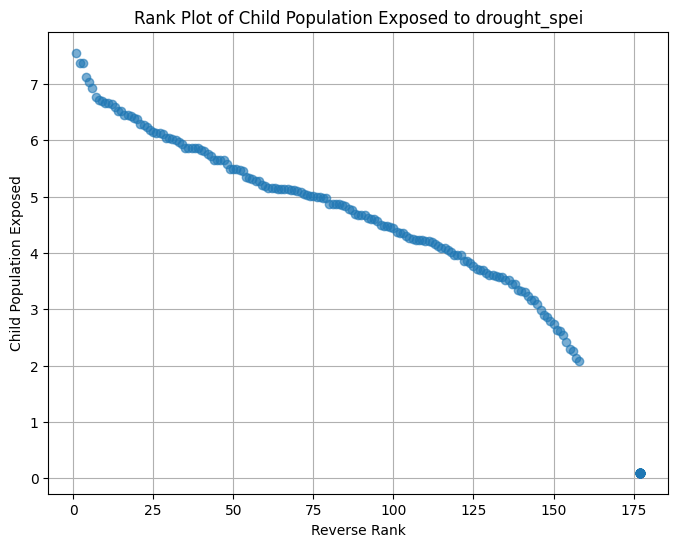

processed : heatwave_duration min: 0.1 max: 8.016308164342078
heatwave_duration: Log Transformation and Scaling - skew=-1.791, kurtosis=3.195
IQR processed : heatwave_duration min: 2.762241969395291 max: 9.206706087004708


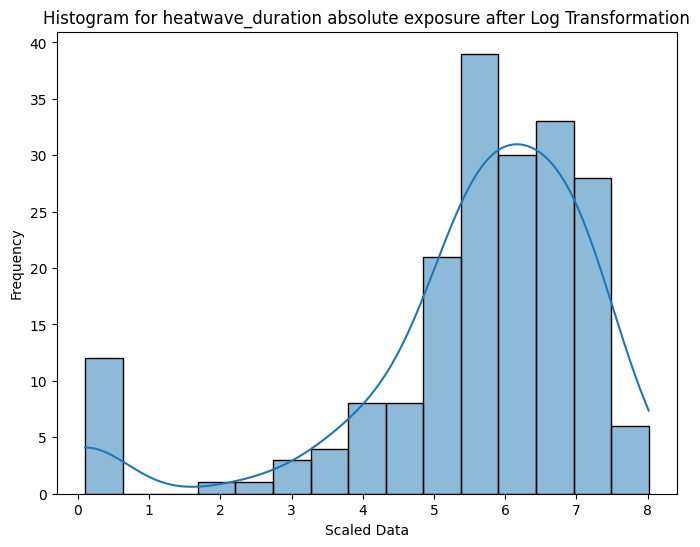

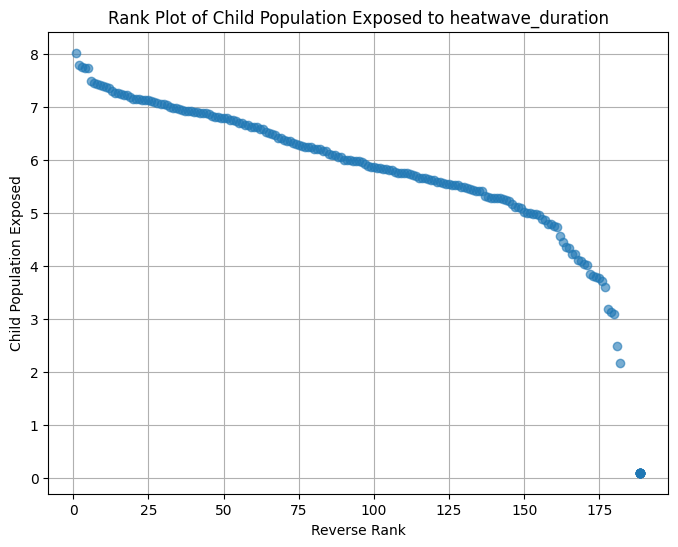

processed : fire_frequency min: 0.1 max: 7.350277241206103
fire_frequency: Log Transformation and Scaling - skew=-0.877, kurtosis=-0.206
IQR processed : fire_frequency min: -0.3599859899286906 max: 9.250480506256284


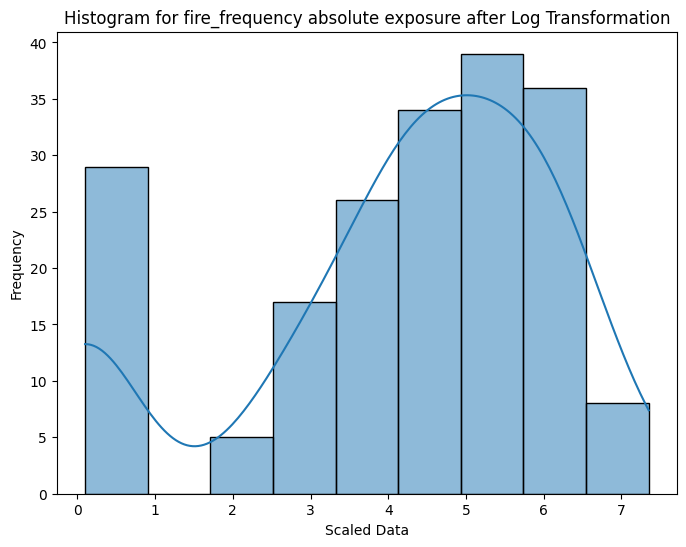

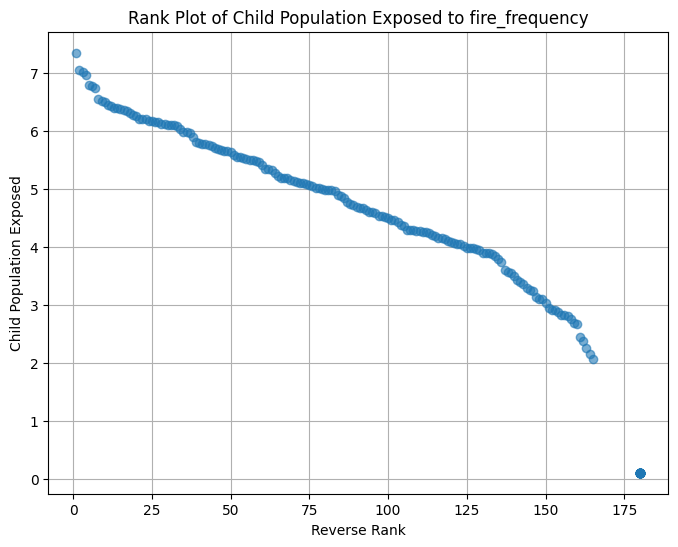

processed : heatwave_frequency min: 2.0401522524456706 max: 7.829064124264654
heatwave_frequency: Log Transformation and Scaling - skew=-1.051, kurtosis=1.417
IQR processed : heatwave_frequency min: 3.0007881498362567 max: 9.07208938501563


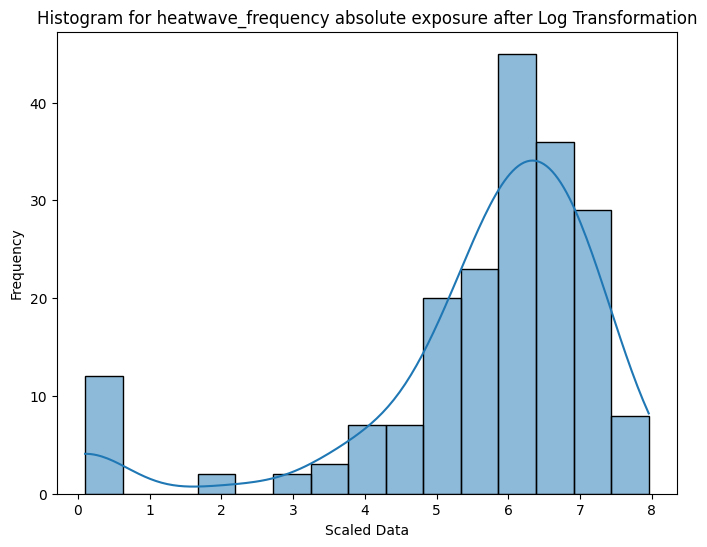

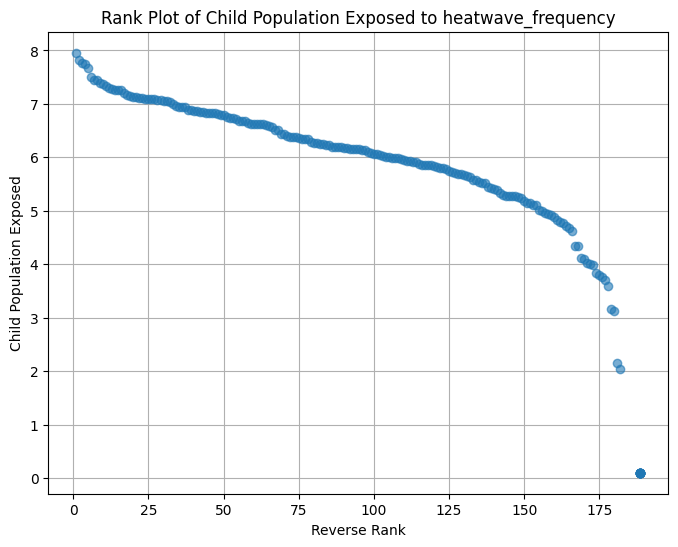

processed : coastal_flood min: 0.1 max: 7.131548303845231
coastal_flood: Log Transformation and Scaling - skew=-0.105, kurtosis=-1.282
IQR processed : coastal_flood min: -5.99207939664109 max: 10.253465661068482


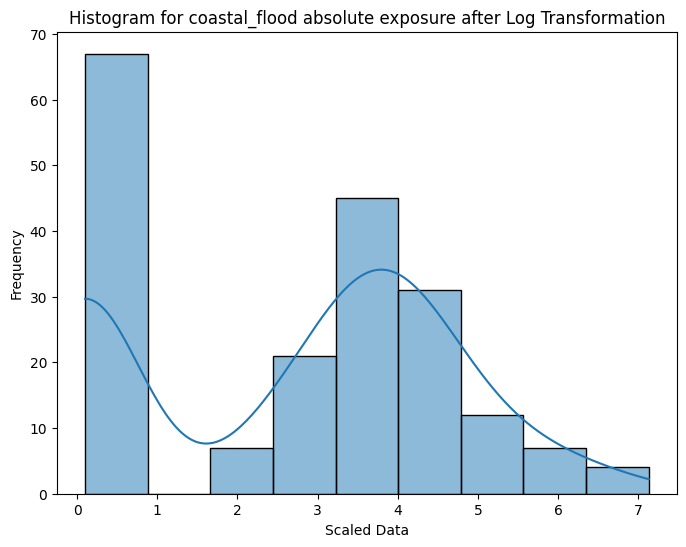

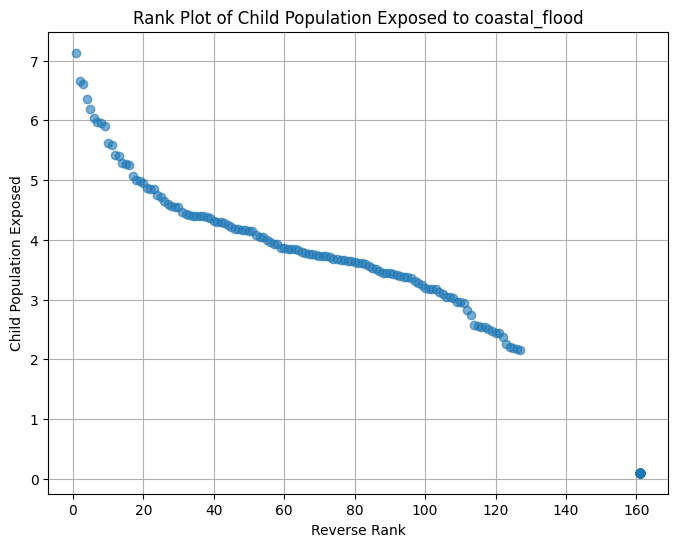

processed : river_flood min: 0.1 max: 7.874513200097062
river_flood: Log Transformation and Scaling - skew=-1.072, kurtosis=-0.008
IQR processed : river_flood min: 1.4894589290781455 max: 8.278263292292353


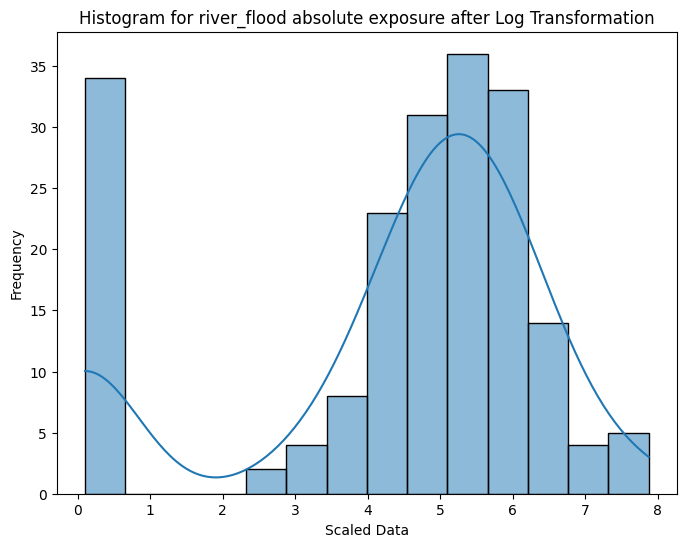

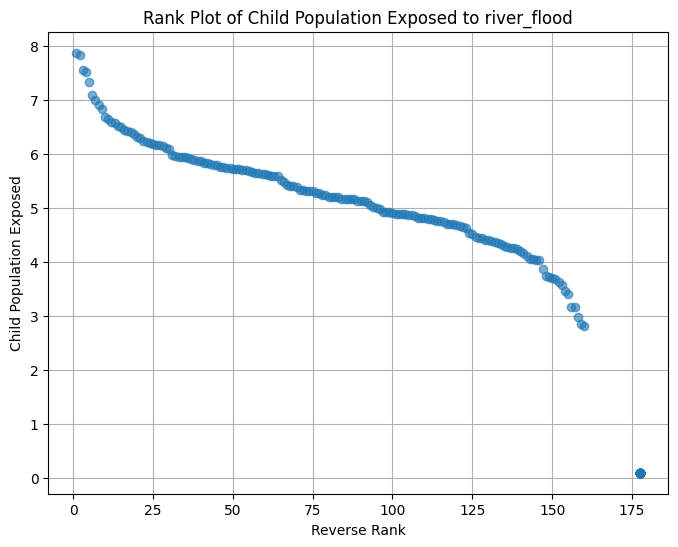

processed : vectorborne_malariapf min: 0.1 max: 8.043459123889761
vectorborne_malariapf: Log Transformation and Scaling - skew=0.472, kurtosis=-1.595
IQR processed : vectorborne_malariapf min: -8.70697027404264 max: 14.778283790071065


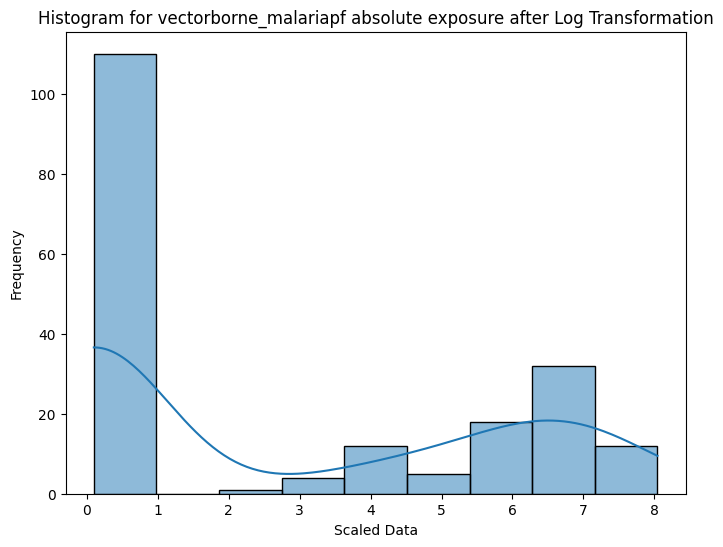

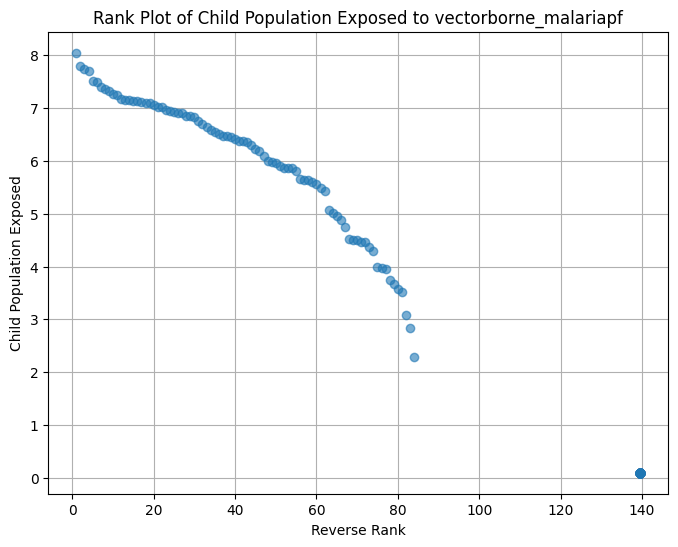

processed : tropical_storm min: 0.1 max: 8.194577491138853
tropical_storm: Log Transformation and Scaling - skew=0.655, kurtosis=-1.380
IQR processed : tropical_storm min: -8.030784254862672 max: 13.651307091437786


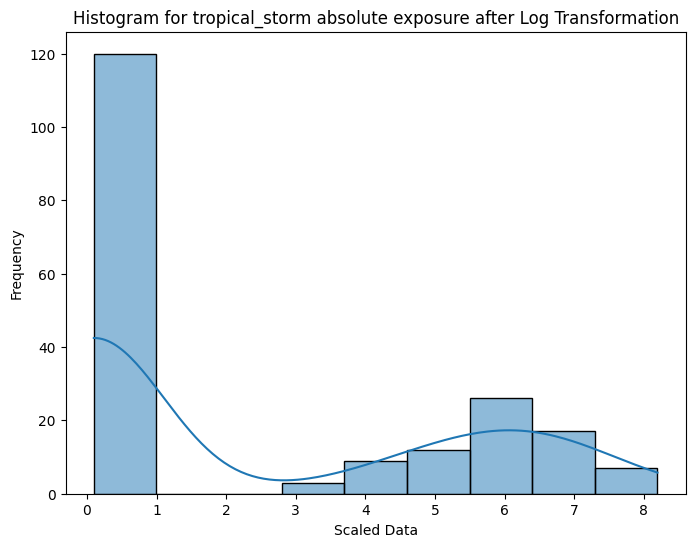

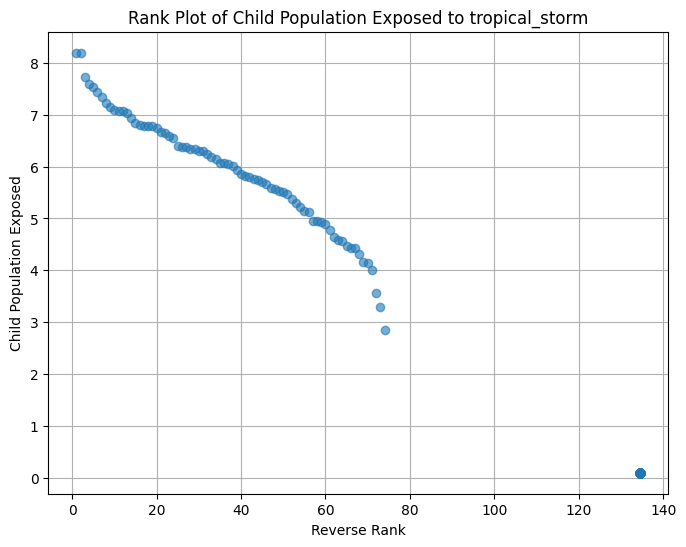

processed : sand_dust min: 0.1 max: 7.20596813310498
sand_dust: Log Transformation and Scaling - skew=-0.223, kurtosis=-1.220
IQR processed : sand_dust min: -7.523316597646791 max: 12.805527662744652


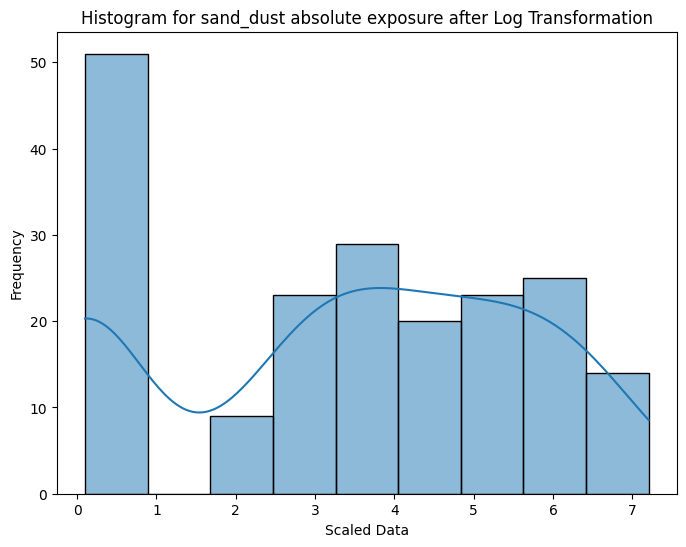

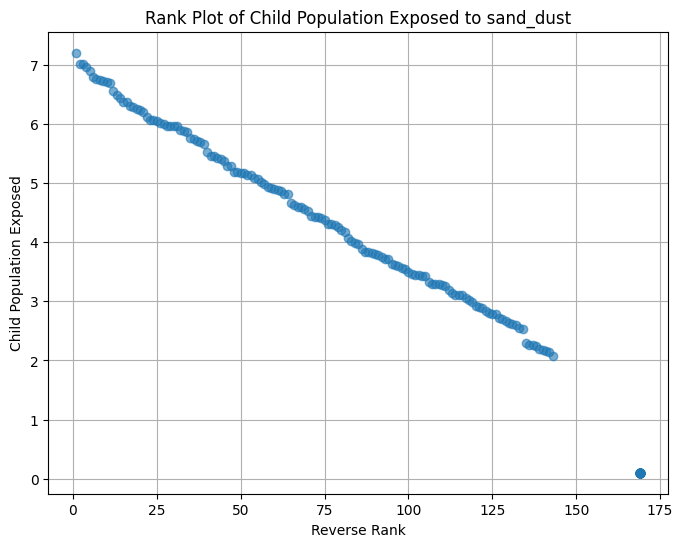

processed : vectorborne_malariapv min: 0.1 max: 8.523170624739743
vectorborne_malariapv: Log Transformation and Scaling - skew=1.313, kurtosis=0.024
IQR processed : vectorborne_malariapv min: -4.406859681757188 max: 7.611432802928647


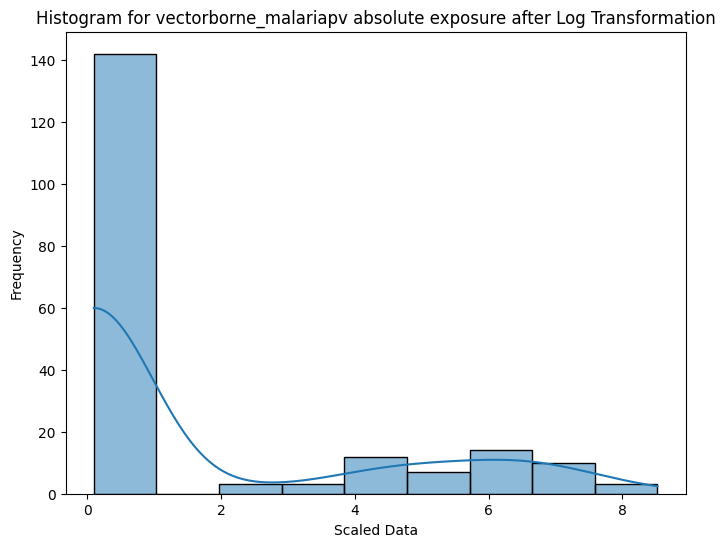

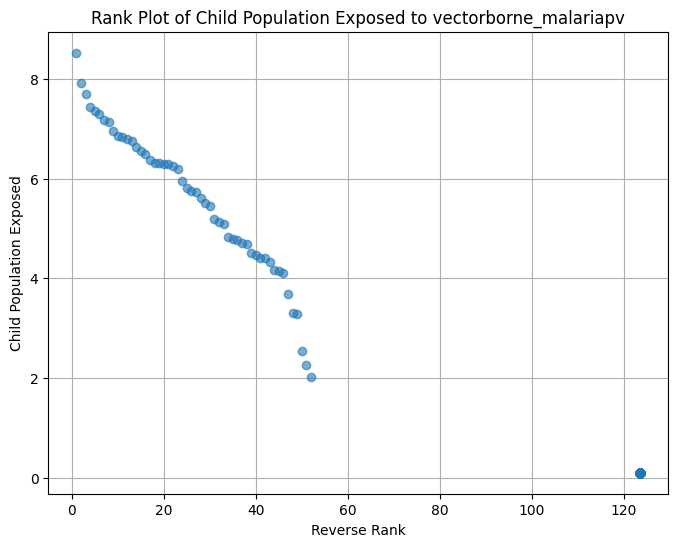

processed : drought_spei min: 0.1 max: 7.554834832953927
drought_spei: Log Transformation and Scaling - skew=-0.692, kurtosis=-0.653
IQR processed : drought_spei min: -0.9414431365056593 max: 9.362758322565774


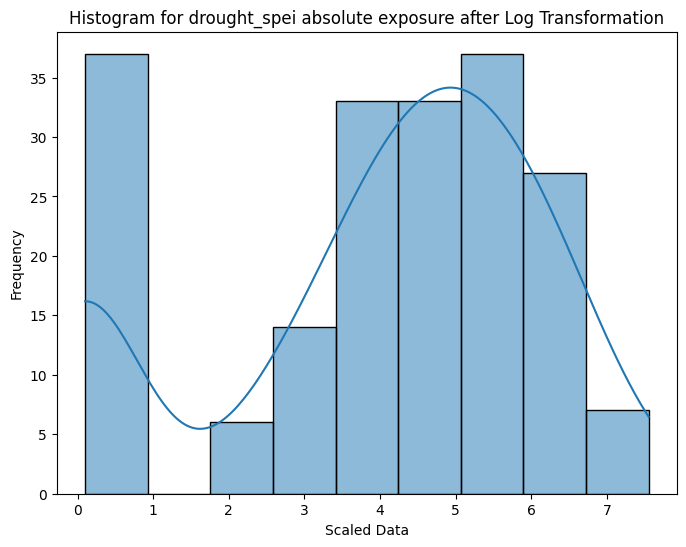

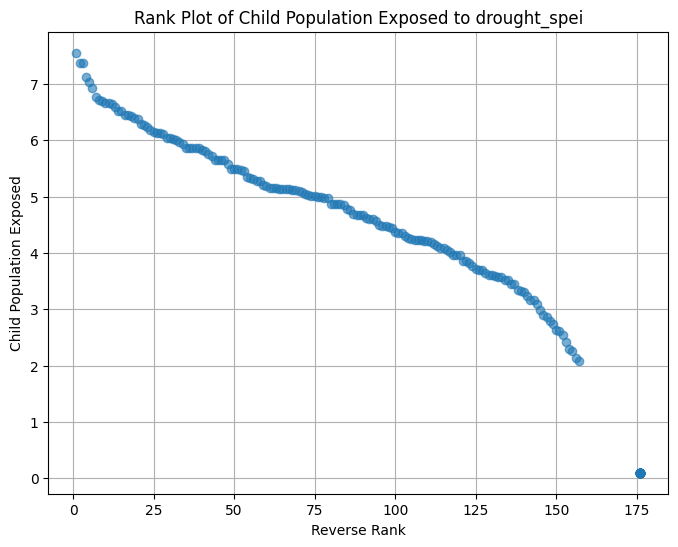

processed : drought_spi min: 0.1 max: 7.371861566519392
drought_spi: Log Transformation and Scaling - skew=-0.284, kurtosis=-1.193
IQR processed : drought_spi min: -7.039286099063212 max: 11.99881016510535


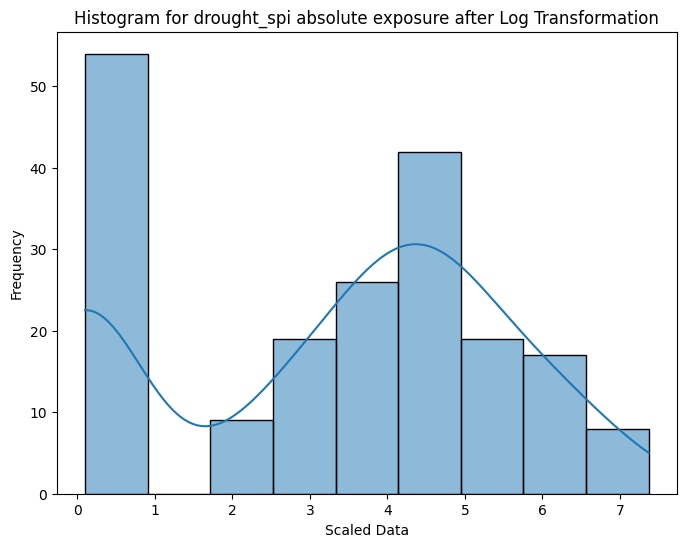

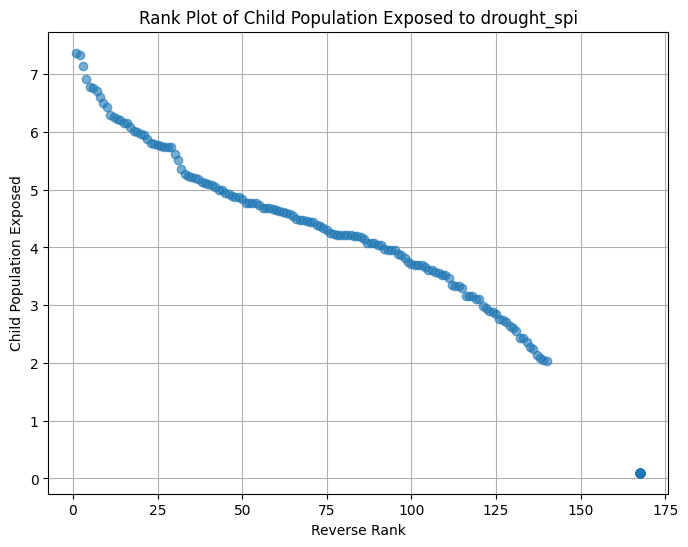

In [12]:

# Folder containing the CSV files
path = f'{data_dir}/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if 'iso3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['iso3', 'child_population_exposed']].dropna()

    # Apply iterative trimming
    # before data trimming, log10 is applied to values higher than 100 otherwise asign 0.1
    df['child_population_exposed'] = df['child_population_exposed'].dropna().values  # Ensure no NaNs
    with np.errstate(divide='ignore'):
      df['child_population_exposed'] = np.where(
          df['child_population_exposed'] > 100,
          np.log10(df['child_population_exposed']),
          0.1
      )
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['child_population_exposed'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])

    print(f"processed : {hazard_name} min: {min_trimmed} max: {max_trimmed}" )
    current_skew = skew(trimmed_values)
    current_kurtosis = kurtosis(trimmed_values)
    print(f"{hazard_name}: Log Transformation and Scaling - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['child_population_exposed'], kde=True)
    plt.title(f"Histogram for {hazard_name} absolute exposure after Log Transformation")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()

    # Compute ranks in reverse order
    df['rank_reverse'] = df['child_population_exposed'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['child_population_exposed'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()



0.0
100.0
Processed: agricultural_drought | Min: 0.0 | Max: 100.0
agricultural_drought: Log Transformation - skew=0.121, kurtosis=-1.193
IQR processed : agricultural_drought min: -6575856.743551058 max: 11191323.793393426


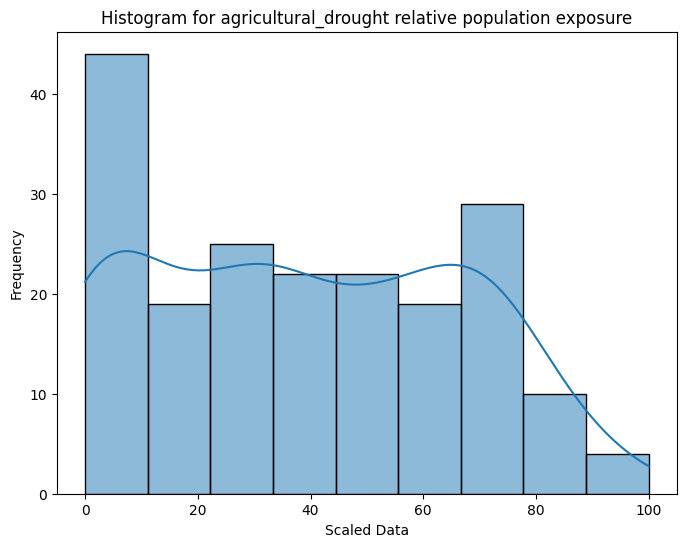

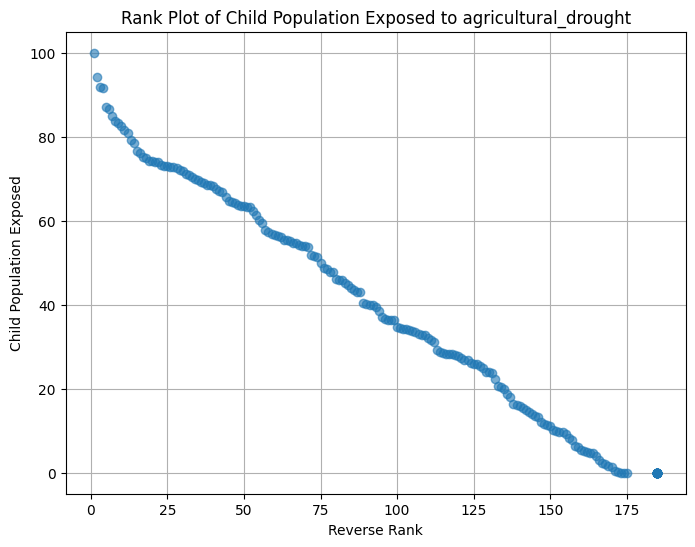

0.0
100.00000000000003
Processed: extreme_heat | Min: 0.0 | Max: 100.00000000000003
extreme_heat: Log Transformation - skew=1.086, kurtosis=-0.348
IQR processed : extreme_heat min: -3801506.738588614 max: 6335844.564314356


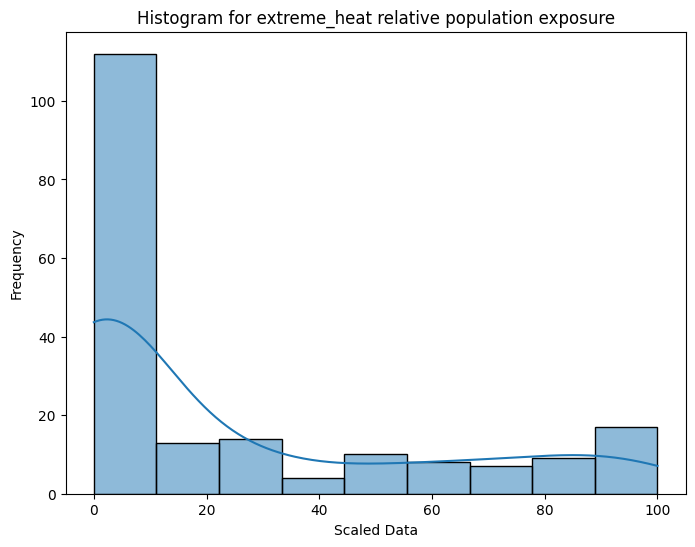

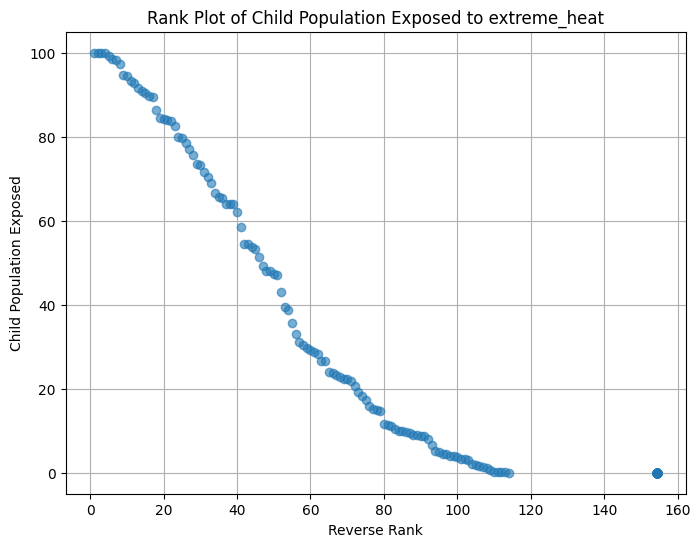

0.0
49.54494827725101
Processed: fire_FRP | Min: 0.1742059634439557 | Max: 22.031918463797105
fire_FRP: Log Transformation - skew=1.749, kurtosis=3.398
IQR processed : fire_FRP min: -598816.5899077357 max: 1017254.1975261617


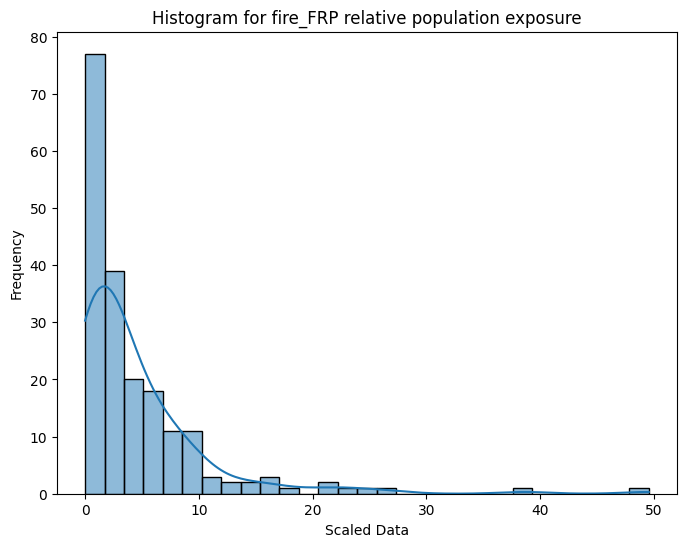

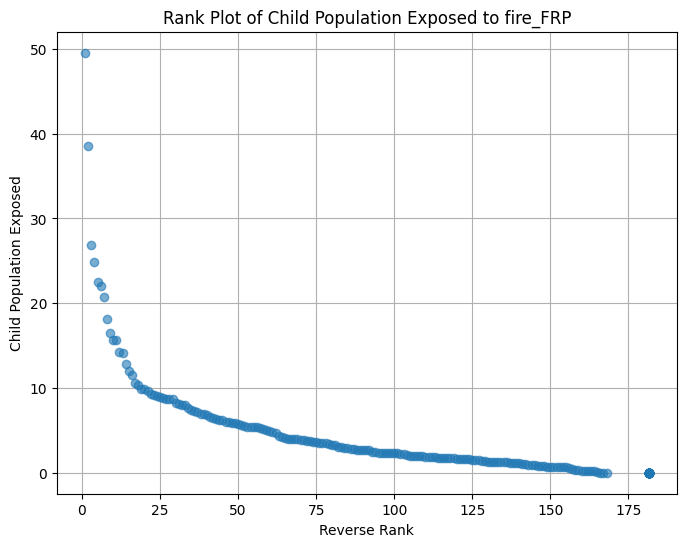

0.0
100.00000000000003
Processed: drought_spi | Min: 0.03974009603751762 | Max: 16.269704304767075
drought_spi: Log Transformation - skew=1.943, kurtosis=3.109
IQR processed : drought_spi min: -106511.84009895839 max: 177556.45482104915


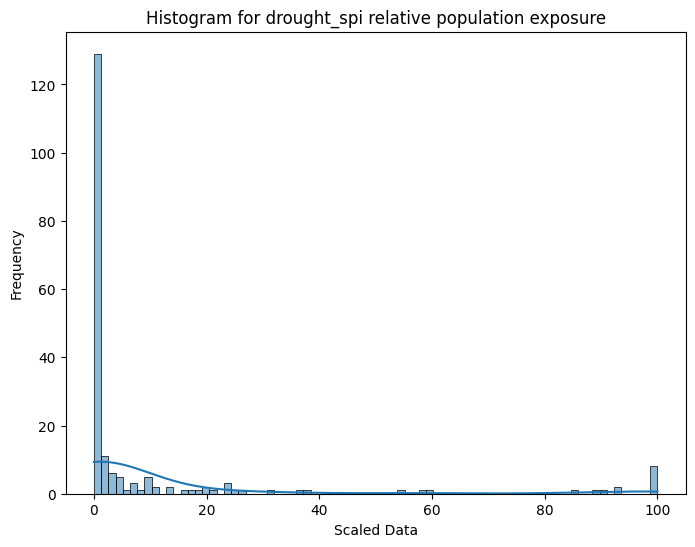

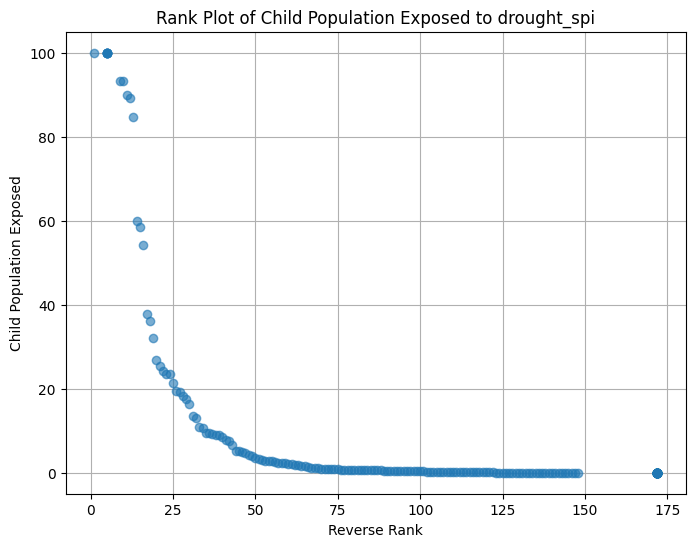

0.0
99.99980625792504
Processed: heatwave_severity | Min: 0.0 | Max: 99.99980625792504
heatwave_severity: Log Transformation - skew=1.791, kurtosis=1.833
IQR processed : heatwave_severity min: -692473.6434064143 max: 1154122.7390106905


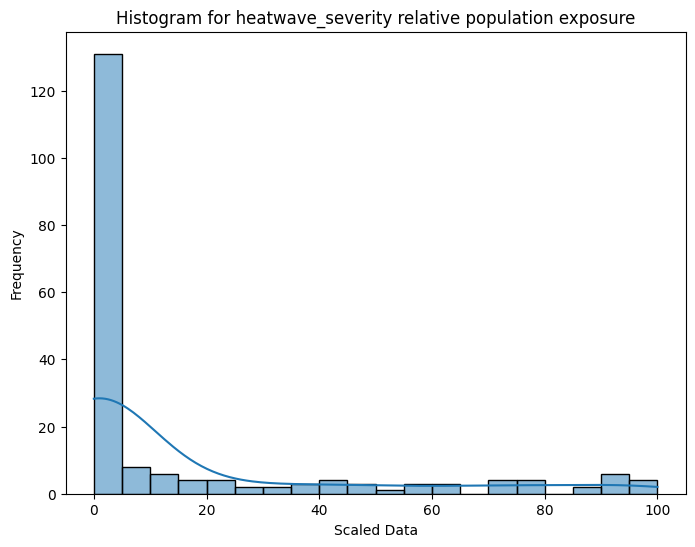

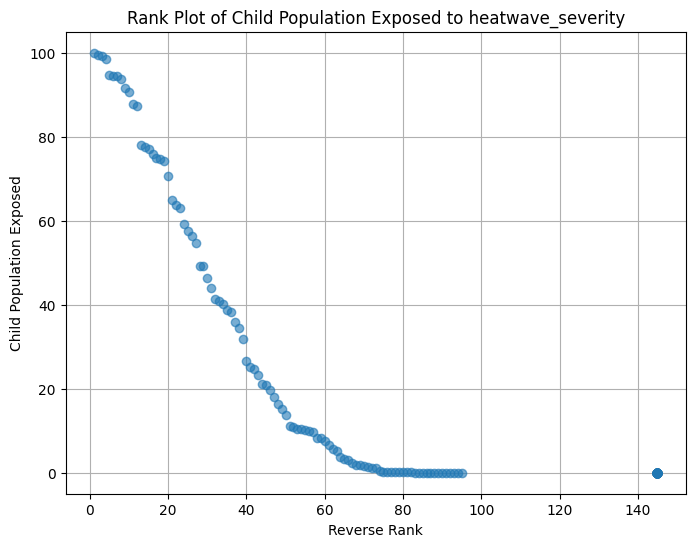

0.0
100.0
Processed: air_pollution | Min: 54.15166591523464 | Max: 99.96516407899644
air_pollution: Log Transformation - skew=-1.983, kurtosis=3.326
IQR processed : air_pollution min: -13438077.519525161 max: 23722030.58433637


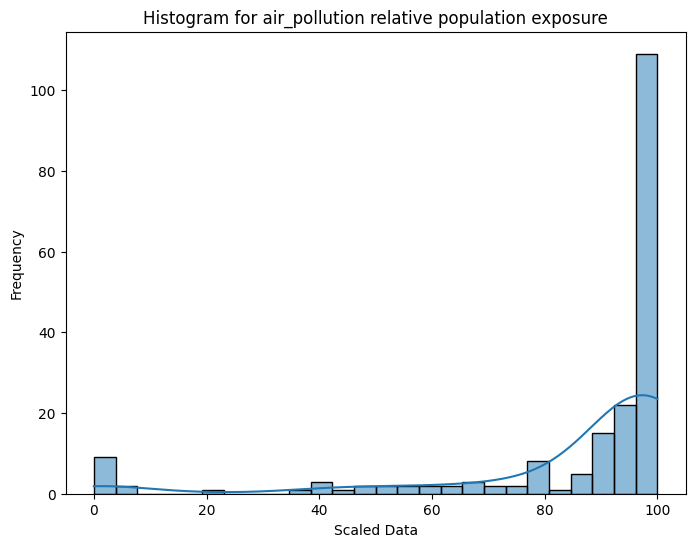

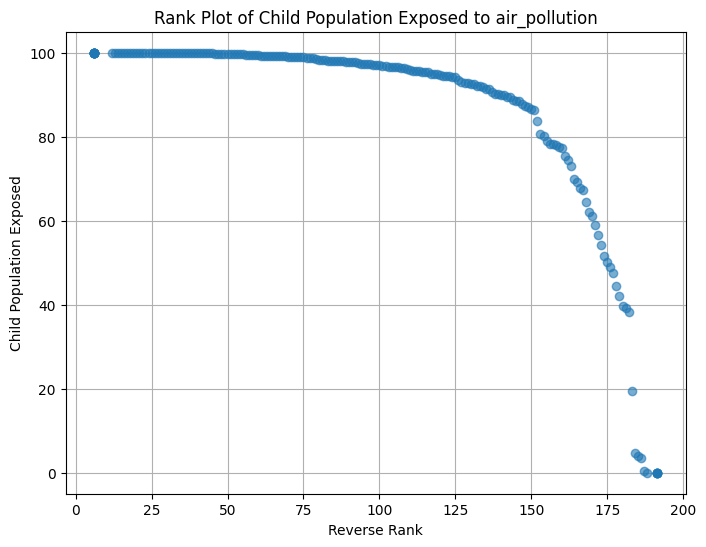

0.0
100.00000000000003
Processed: drought_spei | Min: 0.012181048084152147 | Max: 62.202072722703846
drought_spei: Log Transformation - skew=1.932, kurtosis=2.966
IQR processed : drought_spei min: -469617.591766024 max: 785066.3708271191


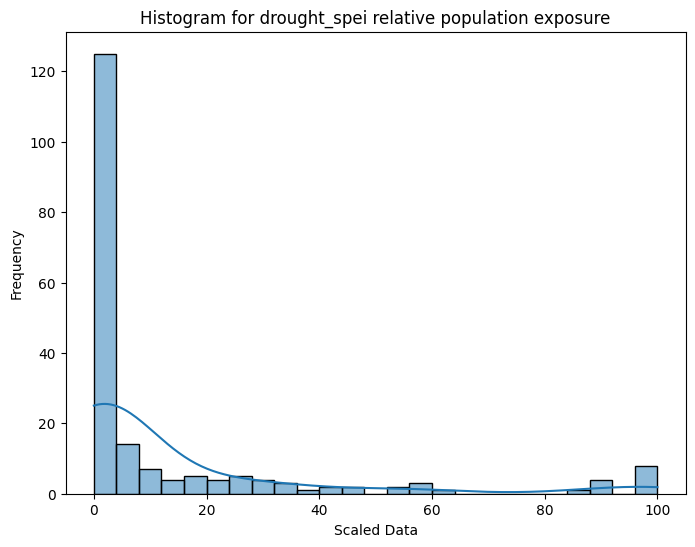

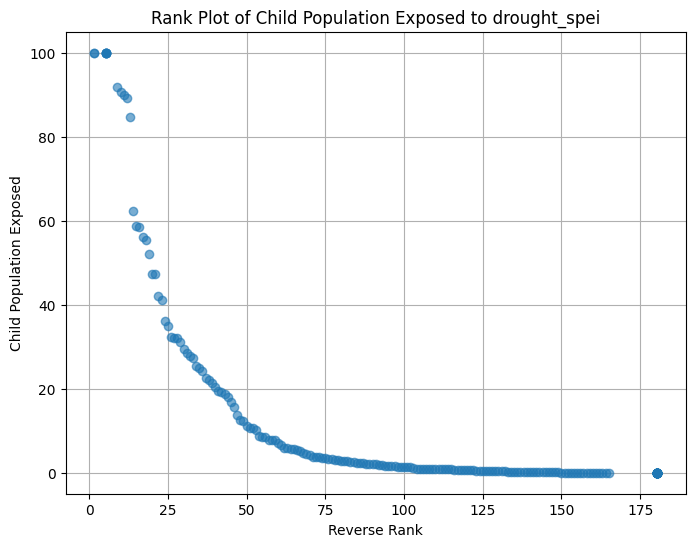

0.0
100.00000000000003
Processed: heatwave_duration | Min: 0.0 | Max: 100.00000000000003
heatwave_duration: Log Transformation - skew=-0.343, kurtosis=-1.382
IQR processed : heatwave_duration min: -8871768.276671898 max: 15189312.408272795


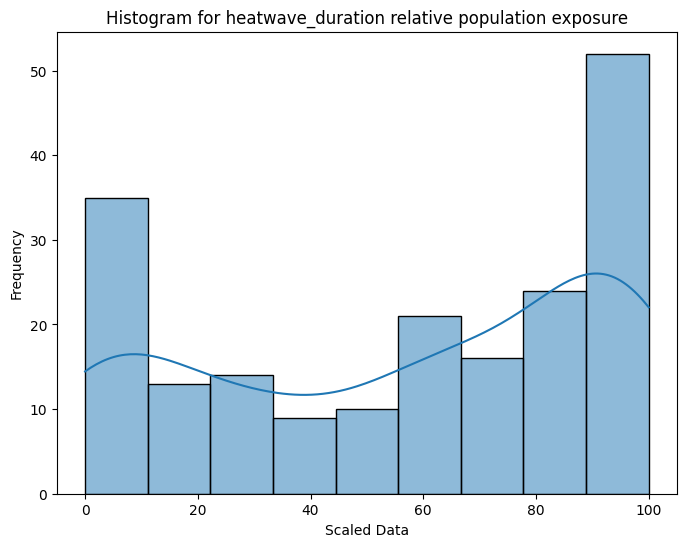

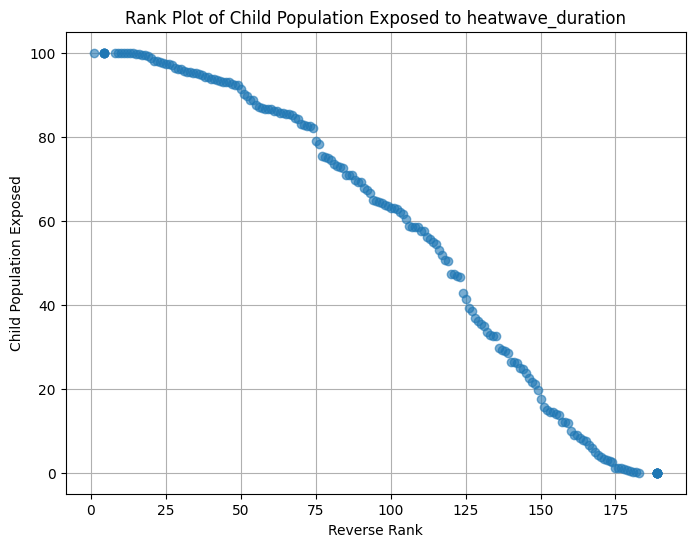

0.0
72.01886442294729
Processed: fire_frequency | Min: 0.07767389019634698 | Max: 27.602067422159248
fire_frequency: Log Transformation - skew=1.811, kurtosis=3.324
IQR processed : fire_frequency min: -660475.2498889676 max: 1105468.557030702


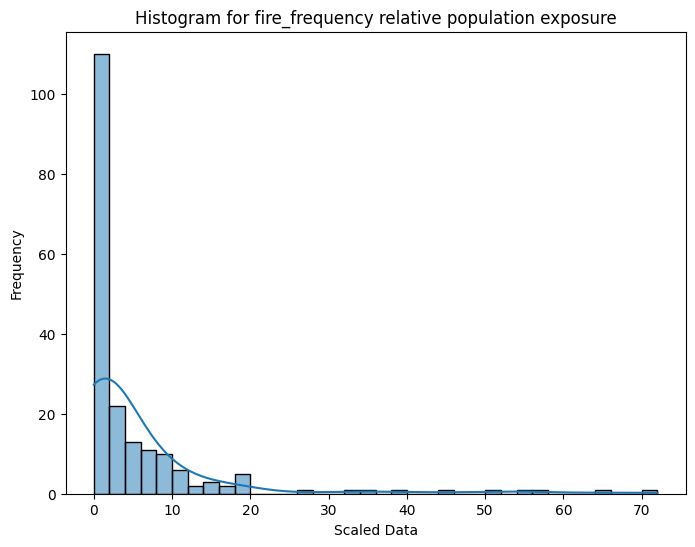

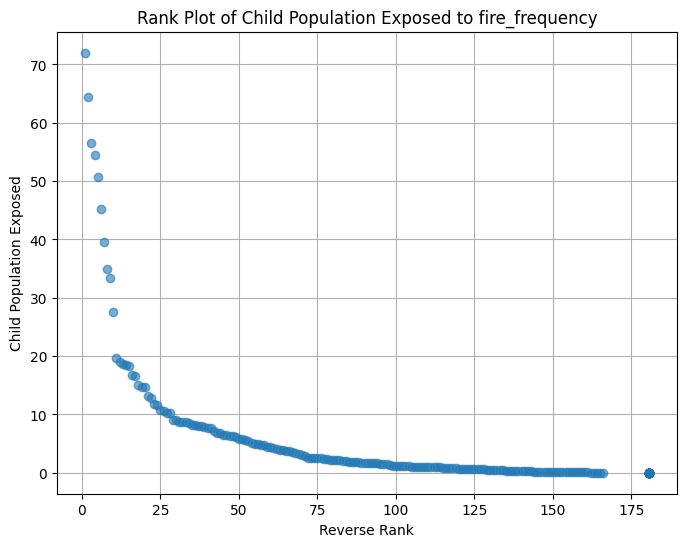

0.0
100.0
Processed: heatwave_frequency | Min: 0.0 | Max: 100.0
heatwave_frequency: Log Transformation - skew=-0.610, kurtosis=-1.056
IQR processed : heatwave_frequency min: -8890149.79050629 max: 15322159.660368536


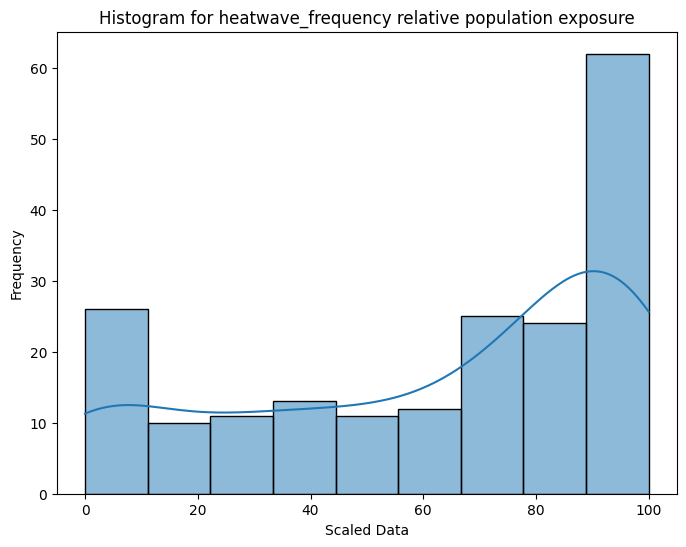

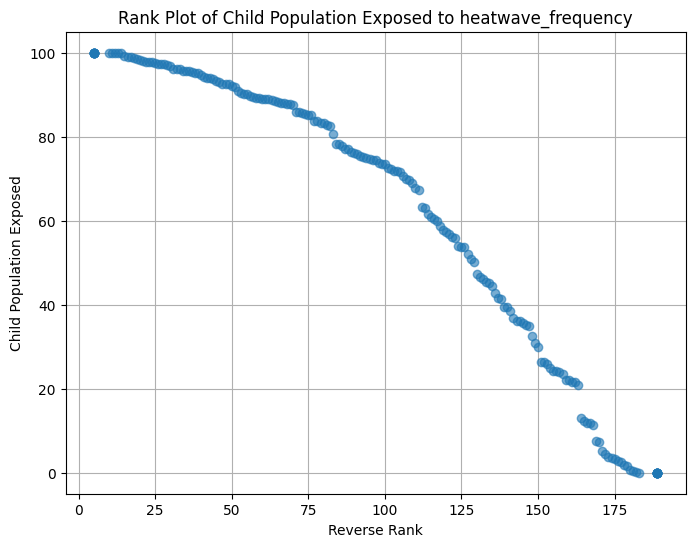

0.0
46.50284264715861
Processed: coastal_flood | Min: 0.0243766699848169 | Max: 2.509239702950422
coastal_flood: Log Transformation - skew=1.985, kurtosis=3.177
IQR processed : coastal_flood min: -21752.86659706597 max: 36254.77766177662


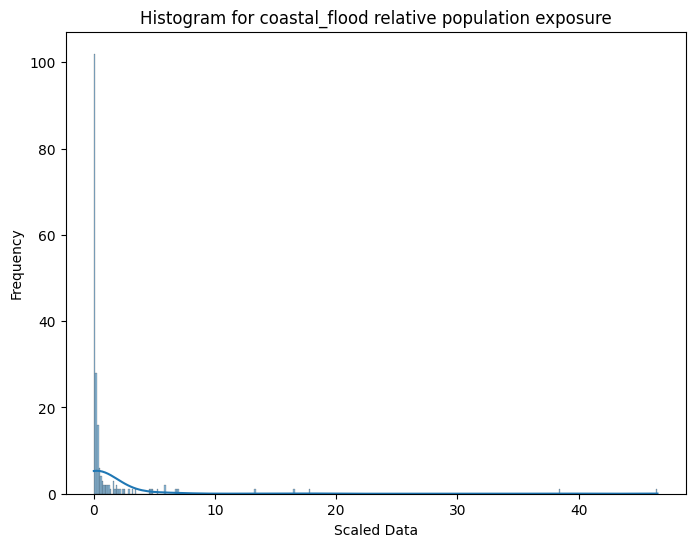

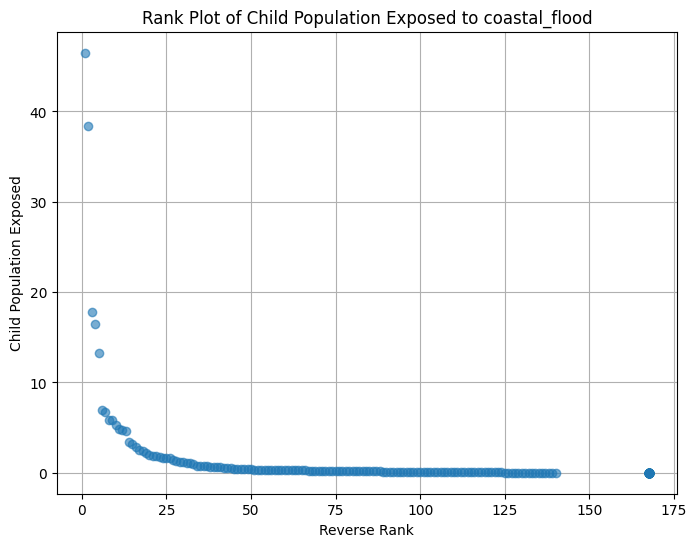

0.0
75.90565373748574
Processed: river_flood | Min: 0.30145732362212196 | Max: 33.229055543494404
river_flood: Log Transformation - skew=1.702, kurtosis=3.141
IQR processed : river_flood min: -783012.7755524572 max: 1333943.9540746622


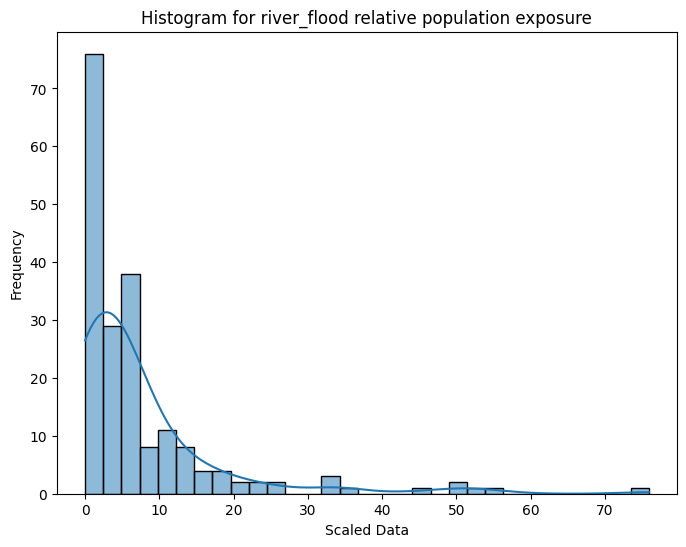

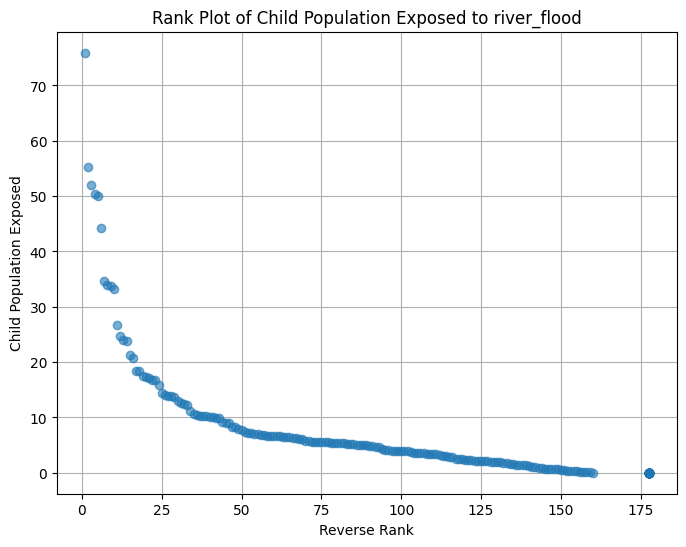

0.0
100.0
Processed: vectorborne_malariapf | Min: 0.0 | Max: 100.0
vectorborne_malariapf: Log Transformation - skew=1.159, kurtosis=-0.545
IQR processed : vectorborne_malariapf min: -1404332.0115741398 max: 2340553.3526235665


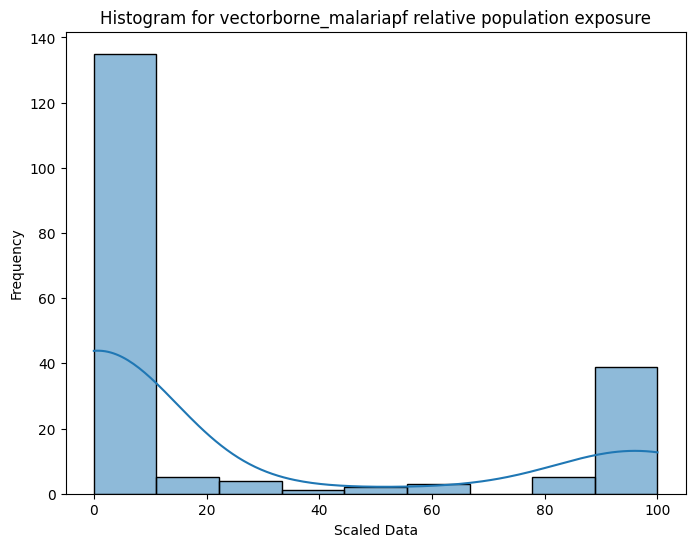

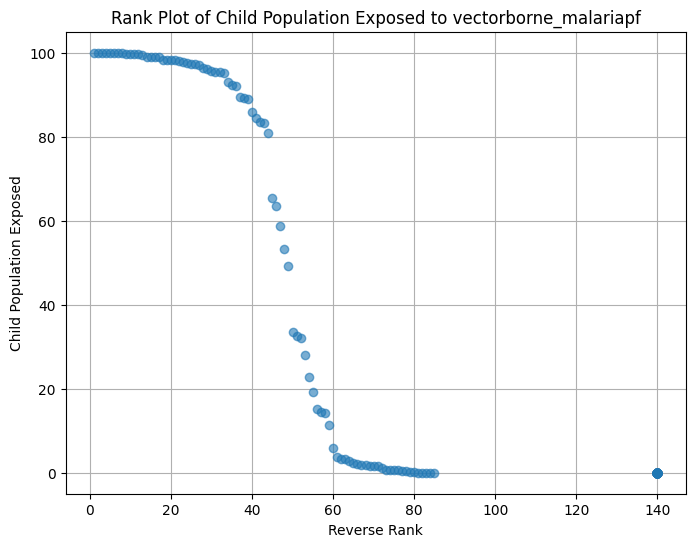

0.0
100.00000000000004
Processed: tropical_storm | Min: 0.0 | Max: 100.00000000000004
tropical_storm: Log Transformation - skew=1.062, kurtosis=-0.718
IQR processed : tropical_storm min: -497321.5832588499 max: 828869.3054314165


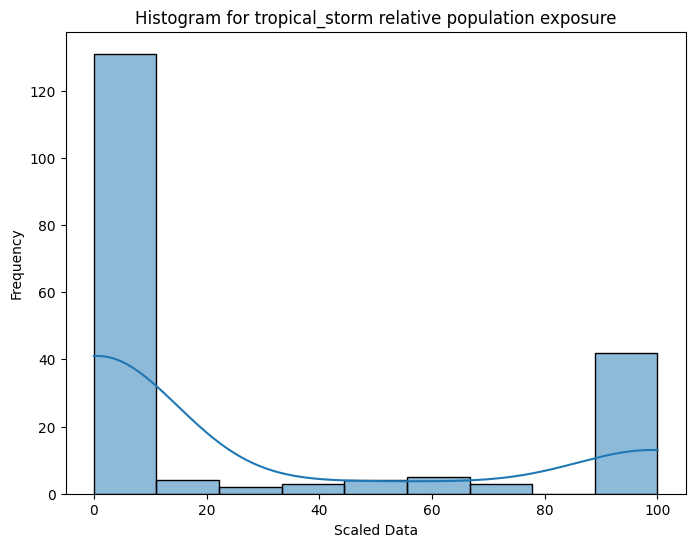

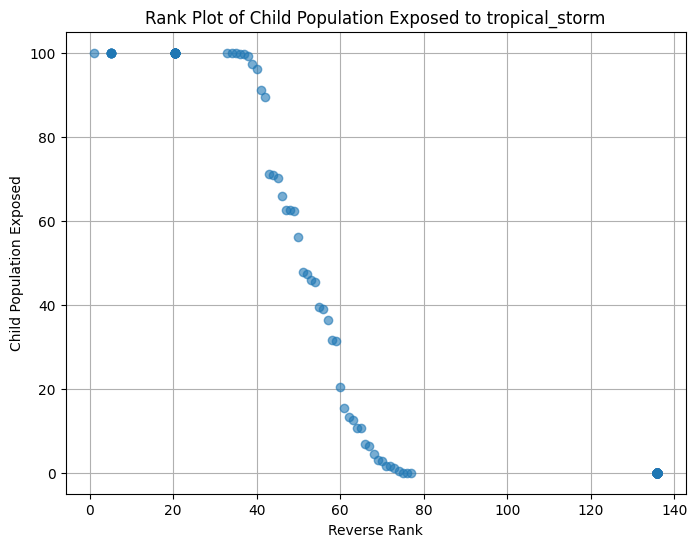

0.0
79.39738384944344
Processed: sand_dust | Min: 0.011051828859527227 | Max: 12.45176110401849
sand_dust: Log Transformation - skew=1.984, kurtosis=3.153
IQR processed : sand_dust min: -227968.1754733439 max: 380196.814490036


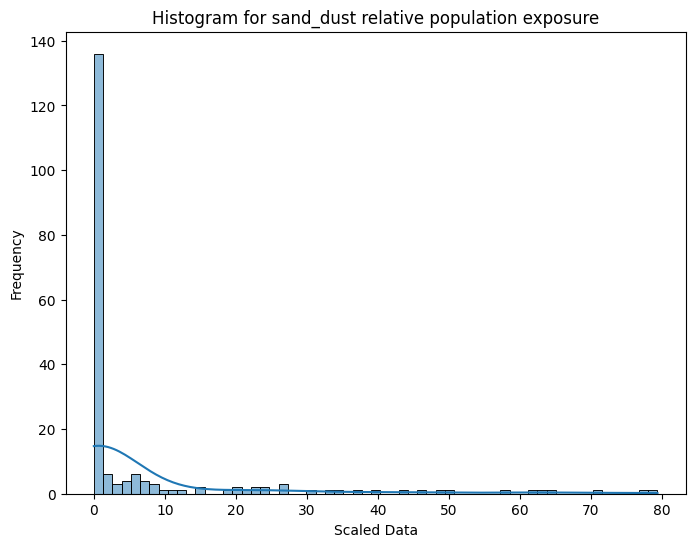

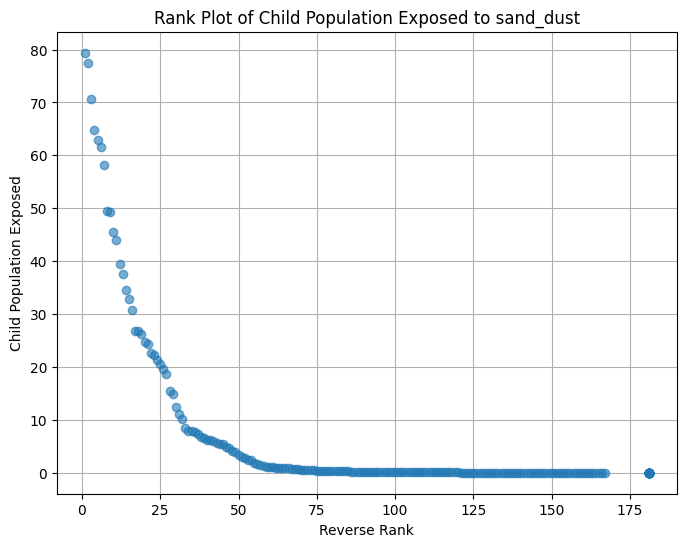

0.0
99.99443008609869
Processed: vectorborne_malariapv | Min: 0.00028292522391126627 | Max: 99.88643738347943
vectorborne_malariapv: Log Transformation - skew=0.604, kurtosis=-1.345
IQR processed : vectorborne_malariapv min: -2335.0701697091026 max: 3891.7836161818377


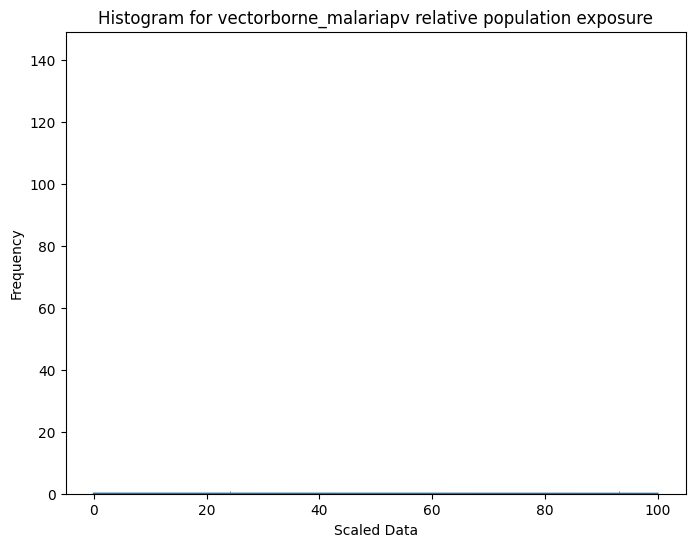

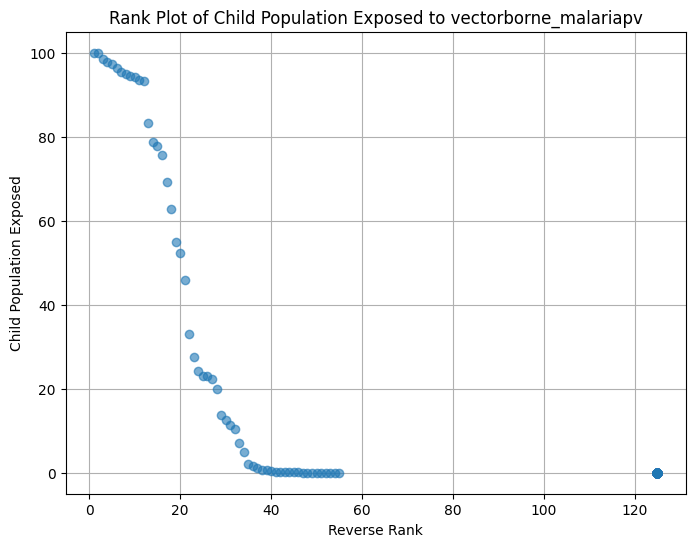

0.0
100.00000000000003
Processed: drought_spei | Min: 0.01218104808415215 | Max: 62.20207272270386
drought_spei: Log Transformation - skew=1.921, kurtosis=2.922
IQR processed : drought_spei min: -470807.0654069508 max: 786920.2663315017


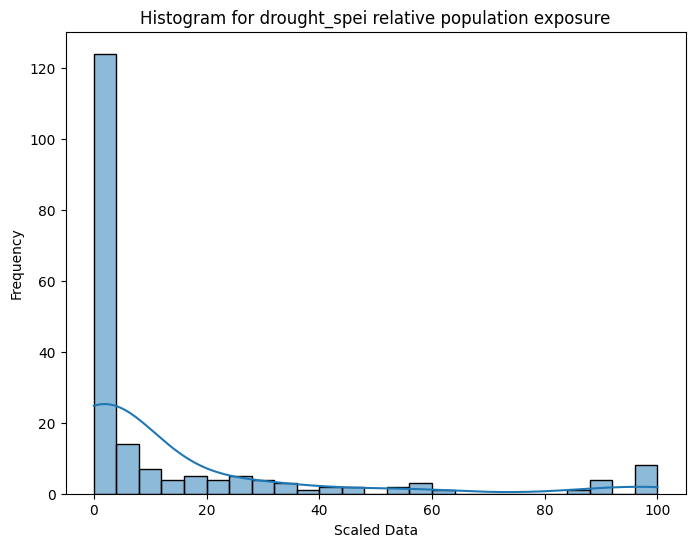

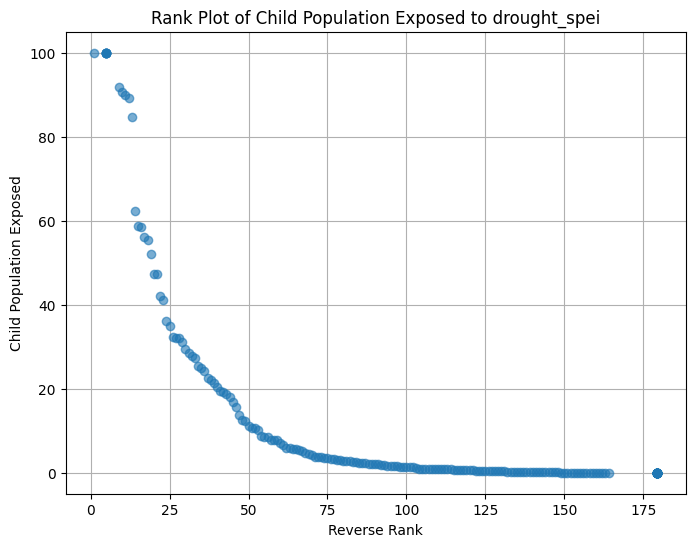

0.0
100.0
Processed: drought_spi | Min: 0.04066877196812541 | Max: 16.269704304767107
drought_spi: Log Transformation - skew=1.929, kurtosis=3.047
IQR processed : drought_spi min: -108578.69526046548 max: 180994.19751292968


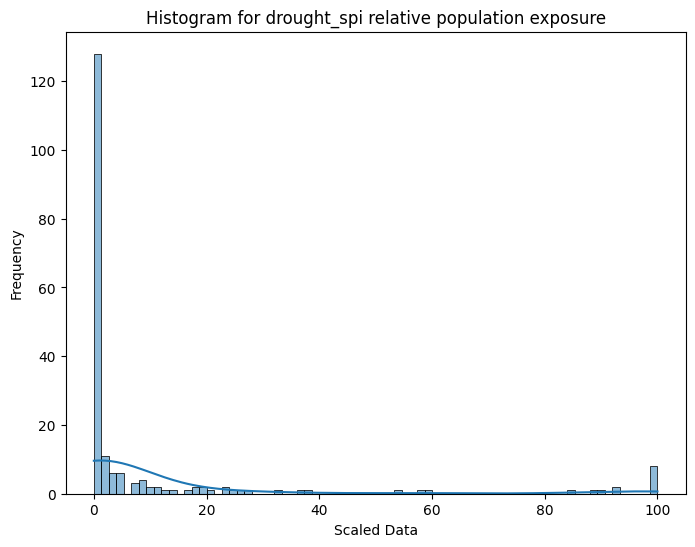

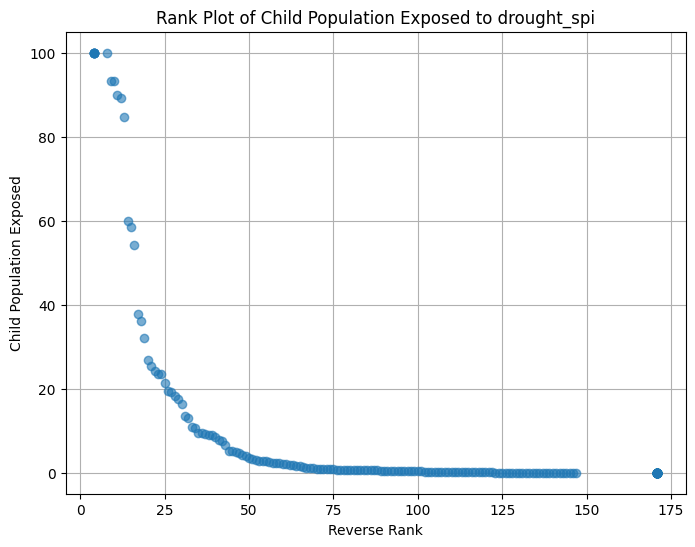

In [13]:

# Process each hazard file
for file in all_files:
    # Exclude the total population file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if 'iso3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['iso3', 'child_population_exposed','child_population_total']].dropna()
    df['relative_population_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        np.nan  # Assign NaN instead of inf
    )

    print( df['relative_population_exposure'].min())
    print( df['relative_population_exposure'].max())
    # Apply iterative trimming
    # Trim outliers
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['relative_population_exposure'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])
    # Check if there are enough values to calculate skewness and kurtosis
    if len(trimmed_values) > 2:
        current_skew = skew(trimmed_values)
        current_kurtosis = kurtosis(trimmed_values)
    else:
        current_skew, current_kurtosis = np.nan, np.nan

    print(f"Processed: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )
    print(f"{hazard_name}: Log Transformation - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['relative_population_exposure'], kde=True)
    plt.title(f"Histogram for {hazard_name} relative population exposure")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()


    # Compute ranks in reverse order
    df['rank_reverse'] = df['relative_population_exposure'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['relative_population_exposure'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()




In [14]:
import os
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Define file paths
exposure_path = f'{data_dir}/p1_exposure'

# Get all CSV files for exposure
exposure_files = glob.glob(os.path.join(exposure_path, "*.csv"))

# Initialize empty list for processed data
exposure_data_list = []

### **Process Each File in One Loop**
for file in exposure_files:

    df = pd.read_csv(file)  # Read full file to check available columns
    filename_only = os.path.basename(file)
    hazard_name = '_'.join(filename_only.split('_')[:2])  # Extract hazard name

    # Ensure required columns exist
    required_cols = {'iso3', 'adm0_name', 'child_population_exposed', 'child_population_total'}
    if not required_cols.issubset(df.columns):
        print(f"Skipping {file}: Missing columns {required_cols - set(df.columns)}")
        continue  # Skip if required columns are missing

    df.dropna(subset=['child_population_exposed'], inplace=True)

    ### **Step 1: Absolute Exposure Processing**
    # Log transform with clipping for values >100, otherwise assign 0.1
    df['absolute_exposure'] = np.where(df['child_population_exposed'] > 100,
                                       np.log10(df['child_population_exposed'].clip(lower=1)),  # Clip to avoid log10(0)
                                       0.1)
    #open min_max data file and use them to normalize the values
    df_min_max = pd.read_csv(f'{data_dir}/CCRI_results_misc/p1_min_max.csv')
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'max'].values[0]

    # clip to min max
    df['absolute_exposure'] = np.clip(df['absolute_exposure'], min_trimmed, max_trimmed)
    # Calculate 5th and 95th percentiles
    # lower_percentile = df['absolute_exposure'].quantile(0.05)
    # upper_percentile = df['absolute_exposure'].quantile(0.95)

    # # Clip values to within the percentile range
    # df['absolute_exposure'] = np.clip(df['absolute_exposure'], lower_percentile, upper_percentile)


    # Normalize using min_trimmed and max_trimmed
    df['absolute_value_normalized'] = 10 * (df['absolute_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)

    ### **Step 2: Relative Exposure Processing**

    # Compute relative exposure (%)
    df['relative_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        0
    )

    # #get min max values for relative exposures
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'max'].values[0]

    # # Normalize relative exposure
    df['relative_exposure'] = np.clip(df['relative_exposure'], min_trimmed, max_trimmed)

    # lower_percentile = df['relative_exposure'].quantile(0.05)
    # upper_percentile = df['relative_exposure'].quantile(0.95)

    # Clip values to within the percentile range
    # df['relative_exposure'] = np.clip(df['relative_exposure'], lower_percentile, upper_percentile)

    df['relative_value_normalized'] = 10 * (df['relative_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)

    #If absolute value is zero, relative is also zero
    df.loc[df['absolute_value_normalized'] == 0, 'relative_value_normalized'] = 0
    df.loc[df['relative_value_normalized'] == 0, 'absolute_value_normalized'] = 0

    # Rename columns for final merging
    df.rename(columns={
        'absolute_value_normalized': hazard_name + '_absolute',
        'relative_value_normalized': hazard_name + '_relative'
    }, inplace=True)

    # Append processed data to list
    exposure_data_list.append(df[['iso3', 'adm0_name',
                                  hazard_name + '_absolute',
                                  hazard_name + '_relative']])

### **Final Merge Step**
# Concatenate all processed DataFrames
merged_exposure_df = pd.concat(exposure_data_list, axis=1).drop_duplicates(subset=['iso3', 'adm0_name'])

# Ensure no duplicate columns before merging
merged_exposure_df = merged_exposure_df.loc[:, ~merged_exposure_df.columns.duplicated()]

# Save merged exposure data
output_path = f"{data_dir}/CCRI_results_misc/Merged_Exposure_Data.csv"
merged_exposure_df.to_csv(output_path, index=False)
print(f"Merged exposure data saved to {output_path}")


Merged exposure data saved to /content/drive/MyDrive/CCRI/ccri_repo/data/CCRI_results_misc/Merged_Exposure_Data.csv
